<a href="https://colab.research.google.com/github/Smart-Lizard/Med_Image_Generation/blob/main/Classification_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/rsm-13/classifying-chestMNIST.git

Cloning into 'classifying-chestMNIST'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 11 (from 1)
Receiving objects: 100% (17/17), 158.40 MiB | 29.07 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd classifying-chestMNIST

/content/classifying-chestMNIST/classifying-chestMNIST/classifying-chestMNIST/classifying-chestMNIST


In [ ]:
!pip install torch torchvision matplotlib

In [ ]:
import torch

# Load the full model directly
model = torch.load('net3.pt', map_location=torch.device('cpu'))

# Set the model to evaluation mode
model.eval()

<ipython-input-34-5df1d37c9d30>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('net3.pt', map_location=torch.device('cpu'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from PIL import Image
from torchvision import transforms

# Load the image
img = Image.open('/content/drive/MyDrive/research/ChestMNIST_Samples/images_single_label/image_10.png')

# Define the transformation to match the model's input size (224x224) and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Example normalization, adjust as needed
])

# Preprocess the image
img_tensor = transform(img)

# Add batch dimension
img_tensor = img_tensor.unsqueeze(0)

In [ ]:
# If your image has only 1 channel (e.g., grayscale), you can repeat the channel 3 times to simulate RGB
img_tensor = img_tensor.repeat(1, 3, 1, 1)  # Repeat along the channel dimension (1 -> 3)

# Now classify the image
with torch.no_grad():
    output = model(img_tensor)

# Get the predicted class
_, predicted_class = torch.max(output, 1)

print(f'Predicted Class: {predicted_class.item()}')

Predicted Class: 3


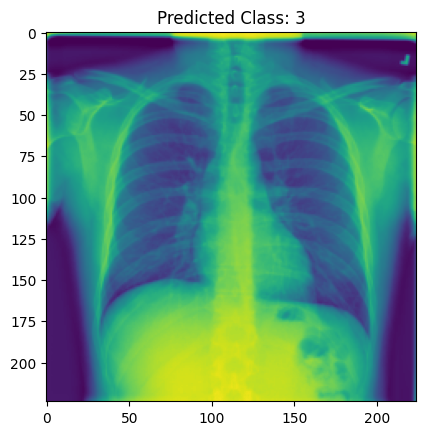

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class.item()}')
plt.show()

In [ ]:
print(output.shape)

torch.Size([1, 14])
